## Prefix Sum

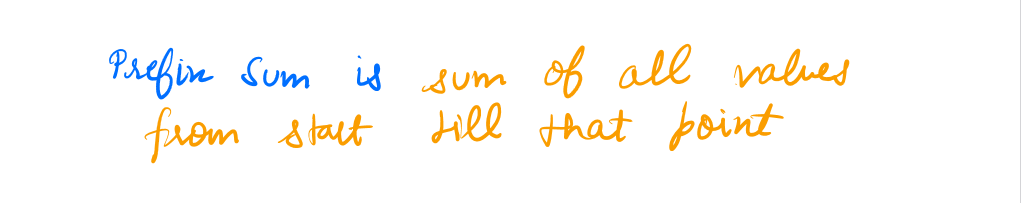

* `prefix sum = a[0] + a[1] + ... + a[i]` 

* For a give list `a = [3, 2, 1]` the prefix sum list would be

    * `index = 0` -> `value = 3`
    * `index = 1` -> `value = [index 0] + 2 = 5`
    * `index = 2` -> `value = [index 0] + [index 1] + 1 = 6`


* To generalise the formula becomes prefix sum of `i`th index for a list `a` is `prefix[i] = prefix[i-1] + a[i]`

* The above formula would not work for `0`th index. So for `pf[0]` would be `a[0]`. 

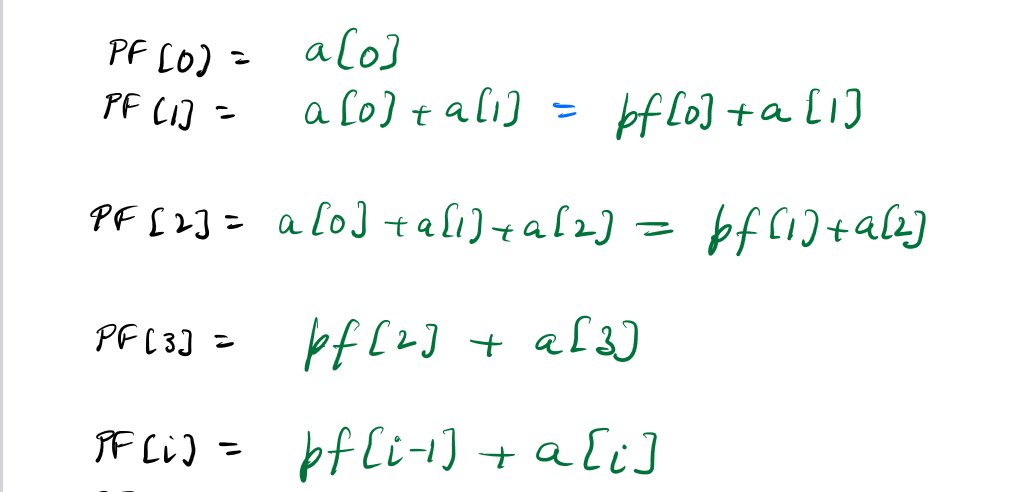


### Usecases

* **Equilibrium index of an array** 

    * The equilibrium index can be defined as the index in the array such that the sum of elements of lower indices is equal to the sum of elements of higher indices. 

    * This can easily be found by traversing the prefixSum array once and for each index `i` checking if the sum of range `[0, i]` is equal to the sum of range `[i+1, n - 1]`.

* **Find if there exists a subarray with sum 0** 
    * Given an array consisting of integers (possibly negative integers). 
 
    * Check if there exists a non-empty subarray such that the sum of elements in it is 0. This can be checked using the prefixSum and some simple hashing concepts.

* **Find the minimum farthest checkpoint reachable** 
    * Given a card with a certain amount of fuel, find the farthest reachable approach if it costs 1 unit of fuel in covering 1 unit of distance. 
    
    * The brute force apporach require *O(n)* time, while if we use the concept of prefixSum and binary search it can be optimised to *O(log n)*
    
    
    
> TIP: Anything requires a range sum, we can think of using prefix sum approach to solve the problem. 

In [12]:
def prefix_sum(a):
    """
    Args:
        [list]a = [3, 2, 1, 5, 4]

    Output:
        [list]: [3, 5, 6, 11, 15]
    """
    prefix_sum = []
    total = 0
    
    # If we are using an index based approach to loop through the list
    # we can start from index 1 since prefix sum of 0 will always be a[0]
    # of list a.
    
    for number in a:
        total += number
        prefix_sum.append(total)
  
    return prefix_sum

In [11]:
a = [1,2,3,4]
prefix_sum(a)

[1, 3, 6, 10]

## Range Sum

> Sum of any range that have start point to the end point. 


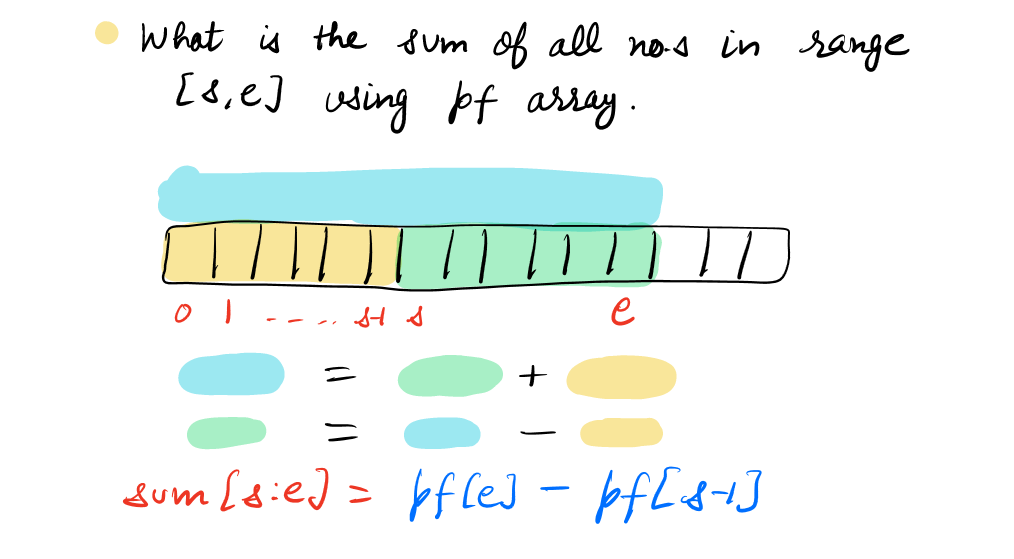


* `sum[s:e]` = Range sum starging from `s` and ending at `e` 
* `pf[e]` - Prefix sum of everyting or till `e`, represented by blue. 
* `pf[s-1]` - Prefix sum of `s-1`, represented by yellow.

> Range Sum != Prefix Sum because prefix always starts from index 0.


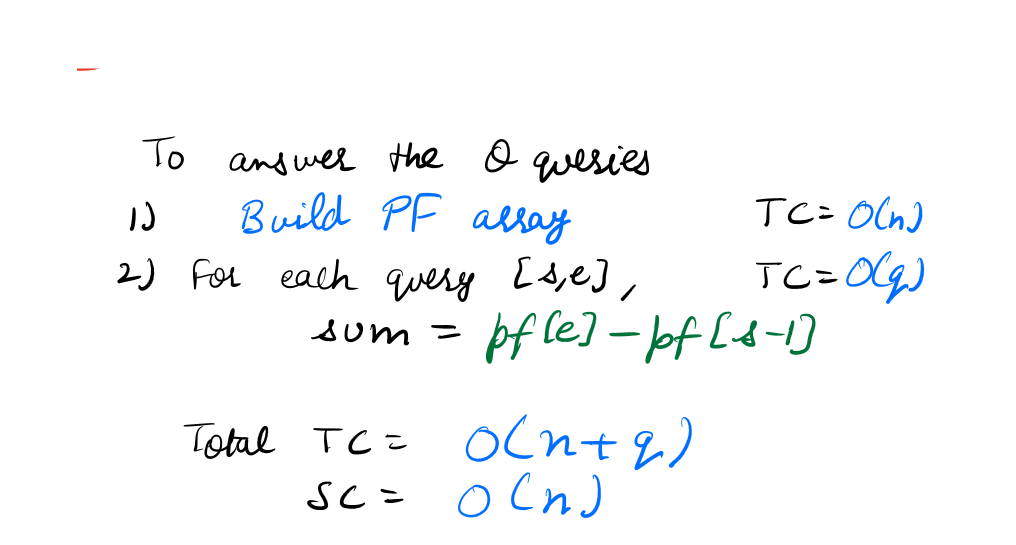

* Space Complexity or `SC` is `O(n)` since we would need to build the prefix sum array.

* Time complexity -> `O(n+q)`
    * Step1. Build Prefix Sum array that would be `O(n)`
    * Step2. TC for all the query woud be`O(q)`.

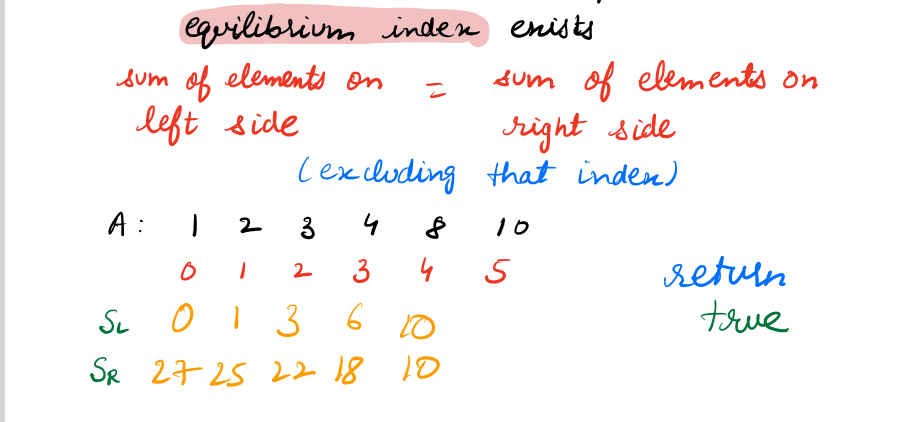


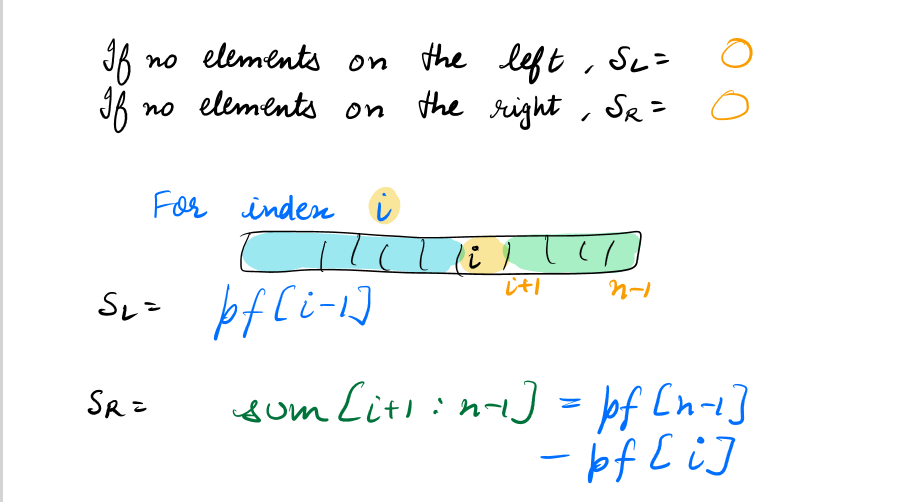


In [37]:
def has_equilibrium_index(a):
    """
    """
    pf_sum = prefix_sum(a)
    n = len(a)
    for i in range(n):

        if i == 0:
            # Sum right should be equal to 0. As theres no left elements.
            sum_left = 0
        else:
            sum_left = pf_sum[i-1]
        
        if i == n-1:
            # Sum right should be equal to 0. As theres no right elements.
            sum_right = 0
        else:
            # Prefix sum of total - prefix sum at i.
            sum_right = pf_sum[n-1] - pf_sum[i]

        if sum_left == sum_right:
            return True

    return False

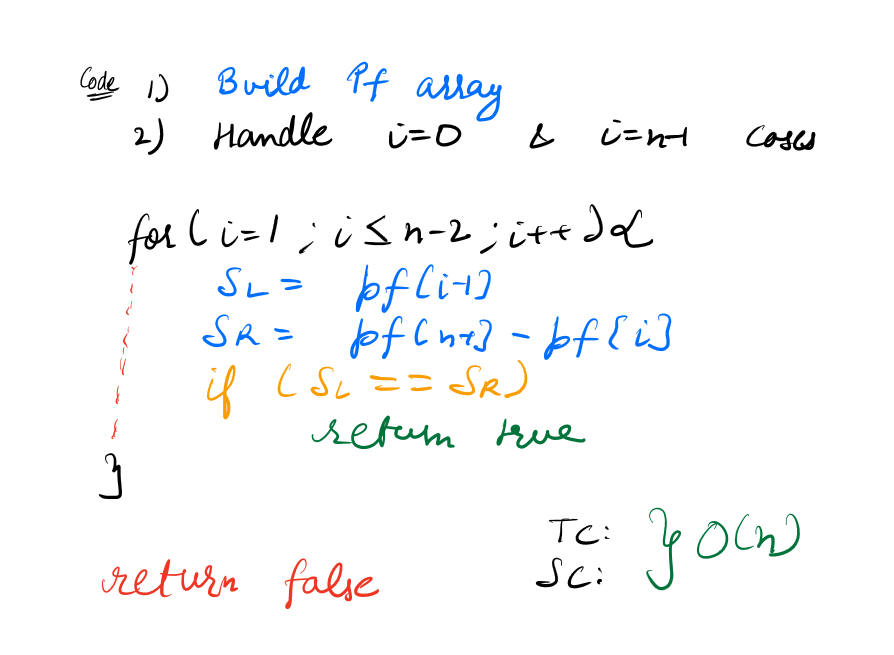

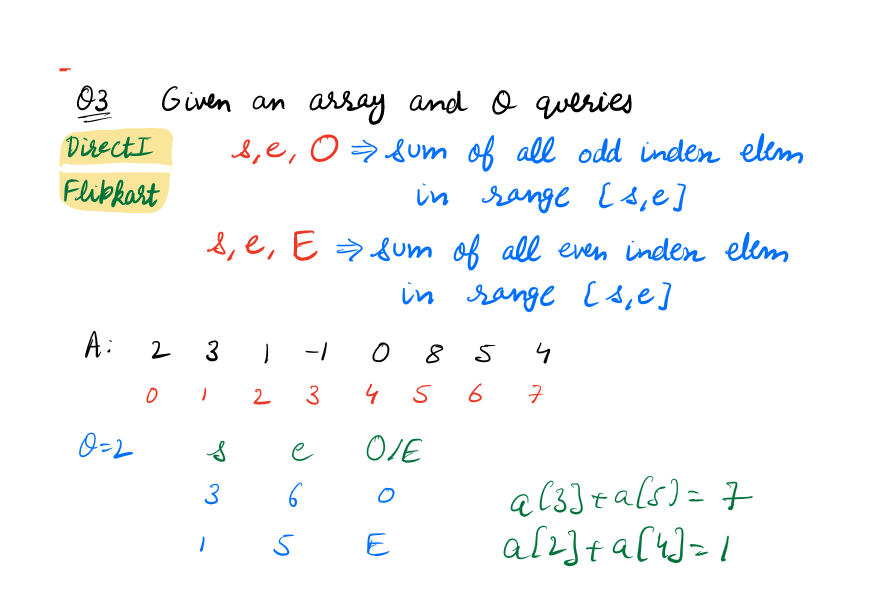

In [79]:
def prefix_even_odd(a):
    """
    Args:
        [list]a

    Output:
        [list]prefix_even: Sum of all even index
        [list]prefix_odd: Sum of all odd index
    """
    prefix_even, prefix_odd = [], []
    total_even, total_odd = 0, 0
    
    for index in range(len(a)):
        if index % 2 == 0:
            total_even = total_even + a[index]
            total_odd = total_odd + 0
        else:
            total_even = total_even + 0
            total_odd = total_odd + a[index]
        
        prefix_even.append(total_even)
        prefix_odd.append(total_odd)
    
    return prefix_even, prefix_odd
           

def even_range(a, queries):
    """
    Args:
        [list]a: List of values
        
        [list[list]]queries: Queries that need to be answered.
    
    Output:
        [list]result: List of all answers from a query.
    """
    even, odd = prefix_even_odd(a)
    result = []
    for query in queries:
        e, s = query[1], query[0]
        
        # Calculate End
        if e == 0:
            end_sum = 0
        else:
            end_sum = even[e]
        
        # Calculate Start
        if s == 0:
            start_sum = 0
        else:
            start_sum = even[s-1]
        
        result.append(end_sum-start_sum)

    return result            
            
            
a = [1, 2, 3, 4, 5]
B = [ [0, 2], [2, 4], [1, 4] ]

even_range(a, B)

[4, 8, 8]

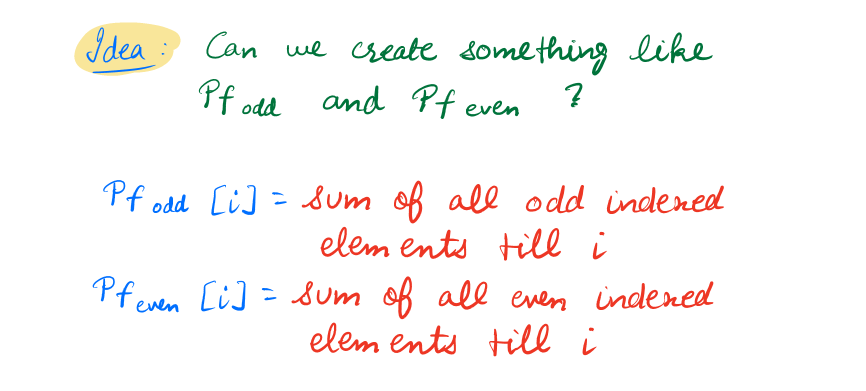

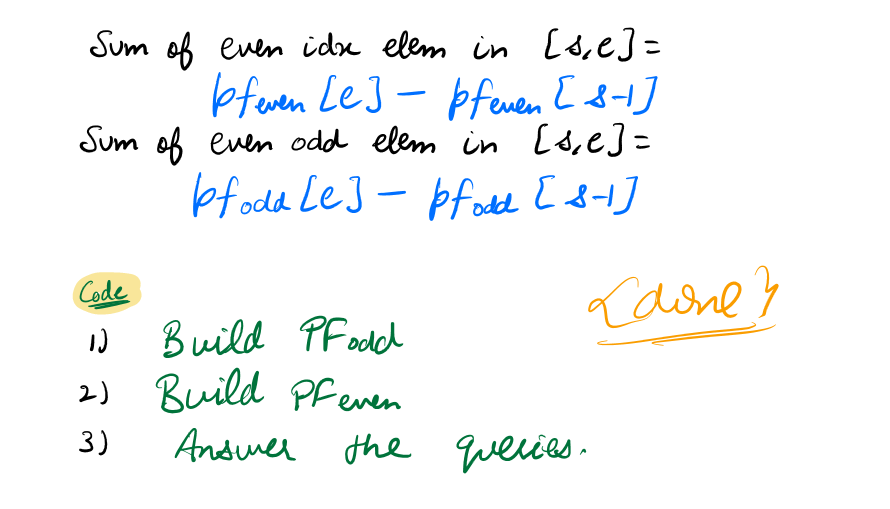

In [80]:
prefix_even_odd([1, 2, 3, 4, 5])

([1, 1, 4, 4, 9], [0, 2, 2, 6, 6])